In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
from sklearn.datasets import load_boston

In [6]:
boston_dataset=load_boston();

In [7]:
boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston['MEDB']=boston_dataset.target

In [10]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDB       0
dtype: int64

In [11]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [12]:
outlier_pt=detect_outliers(boston['RM'])

In [13]:
outlier_pt


[8.725, 8.704, 8.398, 8.78, 3.561, 3.863, 4.138, 4.138]

In [14]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [15]:
sorted(boston['RM'])

[3.561,
 3.863,
 4.138,
 4.138,
 4.368,
 4.519,
 4.628,
 4.652,
 4.88,
 4.903,
 4.906,
 4.926,
 4.963,
 4.97,
 4.973,
 5.0,
 5.012,
 5.019,
 5.036,
 5.093,
 5.155,
 5.186,
 5.272,
 5.277,
 5.304,
 5.304,
 5.344,
 5.349,
 5.362,
 5.39,
 5.39,
 5.399,
 5.403,
 5.404,
 5.404,
 5.412,
 5.414,
 5.427,
 5.453,
 5.454,
 5.456,
 5.468,
 5.52,
 5.531,
 5.536,
 5.56,
 5.565,
 5.569,
 5.57,
 5.572,
 5.593,
 5.594,
 5.597,
 5.599,
 5.602,
 5.604,
 5.605,
 5.608,
 5.613,
 5.617,
 5.627,
 5.628,
 5.631,
 5.637,
 5.648,
 5.663,
 5.67,
 5.682,
 5.683,
 5.693,
 5.701,
 5.705,
 5.706,
 5.707,
 5.708,
 5.709,
 5.713,
 5.713,
 5.713,
 5.727,
 5.731,
 5.741,
 5.747,
 5.757,
 5.757,
 5.759,
 5.762,
 5.782,
 5.783,
 5.786,
 5.787,
 5.79,
 5.794,
 5.803,
 5.807,
 5.813,
 5.813,
 5.818,
 5.822,
 5.834,
 5.836,
 5.837,
 5.841,
 5.85,
 5.851,
 5.852,
 5.854,
 5.854,
 5.856,
 5.856,
 5.857,
 5.859,
 5.868,
 5.869,
 5.87,
 5.871,
 5.872,
 5.874,
 5.875,
 5.875,
 5.876,
 5.877,
 5.878,
 5.879,
 5.88,
 5.884,
 5.885

In [16]:
quantile1, quantile3= np.percentile(boston['RM'],[25,75])
print(quantile1,quantile3)
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

5.8855 6.6235
0.7379999999999995


In [17]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value)
print(lower_bound_val,upper_bound_val)

4.778500000000001 7.730499999999999


In [18]:
boston.drop(boston[boston['RM'] < 4.7].index, inplace = True) 

In [19]:
boston.drop(boston[boston['RM'] > 7.7].index, inplace = True) 

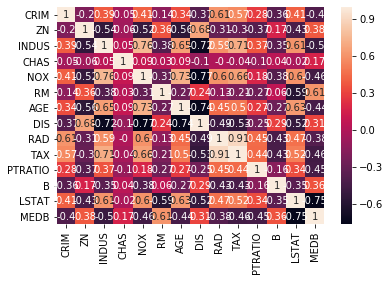

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline


correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#no we will build linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:

Y = boston['MEDB']
X=boston.drop('MEDB',axis=1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(333, 13)
(143, 13)
(333,)
(143,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [27]:

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
Y_Train_Pred=lin_model.predict(X_train)


In [29]:
list(zip(Y_train,Y_Train_Pred))

[(14.1, 15.545486205754457),
 (25.3, 25.532613219626363),
 (19.2, 22.79624479105346),
 (16.6, 15.65550079507701),
 (15.1, 17.278299755796727),
 (23.6, 28.87793575913546),
 (27.9, 19.513201293706135),
 (19.3, 21.12121604491564),
 (19.0, 14.475540784058467),
 (19.6, 18.61069547327457),
 (21.7, 21.198446618205452),
 (10.2, 16.000221594320678),
 (17.0, 20.084736515950354),
 (20.3, 22.26718639821503),
 (20.0, 21.991645823867422),
 (35.4, 33.18168908100066),
 (28.7, 29.21069986694797),
 (20.2, 22.106319895487466),
 (22.0, 28.088096197397178),
 (11.0, 14.062858737423305),
 (15.6, 15.68909787139706),
 (25.0, 24.154584730149963),
 (44.0, 35.501202866980066),
 (21.0, 21.187046734788417),
 (28.5, 32.09879420735672),
 (20.7, 22.222075245819397),
 (22.9, 22.88137349617194),
 (15.0, 18.6798771130333),
 (22.5, 17.901609219505403),
 (18.7, 21.754729828489605),
 (23.6, 27.684604989106035),
 (23.9, 25.991258864402774),
 (24.5, 27.184658520200976),
 (8.3, 12.856447975841448),
 (24.8, 25.382507733257675),

In [30]:
rmse = (np.sqrt(mean_squared_error(Y_train, Y_Train_Pred)))


from sklearn.metrics import r2_score,accuracy_score
r2 = r2_score(Y_train, Y_Train_Pred)
print(r2)
print(rmse)

0.7226134255264498
3.977281649569497


In [31]:
lin_model.fit(X_test, Y_test)
Y_test_Pred=lin_model.predict(X_test)

In [32]:
rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_test_Pred)))



from sklearn.metrics import r2_score,accuracy_score
r2 = r2_score(Y_test, Y_test_Pred)
print(r2)
print(rmse_test)

0.7717575221548771
3.9726307462048607


In [33]:
#remove the multi colinear coumns RAD and TAX are colinear see above diagram for your refrence 
X_Tax=X['TAX']
X_RAD=X['RAD']

X=boston.drop('TAX',axis=1)

In [34]:
#trying by adding TAX and removing RAD
X=pd.concat([X,X_RAD],axis=1)
X.head()
X=boston.drop('RAD',axis=1)

In [35]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDB
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [36]:
#main coumns in dataset found by using above diagram and the relation diagram is in below #need to check features by add properly
plt.figure(figsize=(20, 5))

features = boston['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

KeyError: ('LSTAT', 'RM')

<Figure size 1440x360 with 0 Axes>